<a href="https://colab.research.google.com/github/napoles-uach/FDTD/blob/master/FDTD2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
N    = 300     
T    = 1     
              
Tp   = 50      



sigma = 40.0 

k0 = np.pi/20 

In [3]:
longitud=40e-9
dx=longitud/N
 
m    = 9.1e-31    
hbar = 1.054e-34   
dt   = 0.25*(m/hbar)*dx**2 

c1=1.0/8.0
c2=dt/hbar
lmbda=5*dx

In [4]:
c1

0.125

In [5]:
dt

3.837233818258486e-17

In [6]:
ddx=dt*3e8

In [7]:
ddx/dx

86.33776091081593

In [8]:
psi_r = np.zeros((N,N)) 
psi_i = np.zeros((N,N)) 
psi_p = np.zeros((N,N))   
ptot=0.0
mi=3
mj=3
psi_r = np.zeros((N,N)) 
psi_i = np.zeros((N,N)) 
psi_p = np.zeros((N,N))   
ptot=0.0
mi=3
mj=3
kx=mi*np.pi/N
ky=mj*np.pi/N
kk=np.sqrt(kx**2+ky**2)
gamma=(1/6.)+(kk**2/180.)+(kk**4/7698.)
gamma

0.16667763339993172



```
# Esto tiene formato de código


for i in xrange(1,N-1):
    for j in xrange(1,N-1):
        psi_r[i][j]=np.sin(mi*np.pi*i/N)*np.sin(mj*np.pi*j/N)
        psi_i[i][j]=0.0
        ptot=ptot+psi_r[i][j]**2+psi_i[i][j]**2        
for i in xrange(1,N):
    for j in xrange(1,N):
        psi_r[i][j]=psi_r[i][j]/np.sqrt(ptot)
        psi_i[i][j]=psi_i[i][j]/np.sqrt(ptot)
        ptot1=ptot+psi_r[i][j]**2+psi_i[i][j]**2
        ptot=ptot+psi_r[i][j]**2+psi_i[i][j]**2
```

In [9]:
for i in range(1,N-1):
    for j in range(1,N-1):
        psi_r[i][j]=np.sin(kx*i)*np.sin(ky*j)
        psi_i[i][j]=0.0
        ptot=ptot+psi_r[i][j]**2+psi_i[i][j]**2        
for i in range(1,N):
    for j in range(1,N):
        psi_r[i][j]=psi_r[i][j]/np.sqrt(ptot)
        psi_i[i][j]=psi_i[i][j]/np.sqrt(ptot)
        ptot1=ptot+psi_r[i][j]**2+psi_i[i][j]**2
        ptot=ptot+psi_r[i][j]**2+psi_i[i][j]**2

In [10]:
for t in range(T+1):
        for i in range(1,N-2):
            for j in range(1,N-2):
                psi_r[i][j]=psi_r[i][j]-c1*( psi_i[i+1][j]+psi_i[i-1][j]+psi_i[i][j+1]+psi_i[i][j-1]-4*psi_i[i][j] )
                psi_i[i][j]=psi_i[i][j]+c1*( psi_r[i+1][j]+psi_r[i-1][j]+psi_r[i][j+1]+psi_r[i][j-1]-4*psi_r[i][j] )

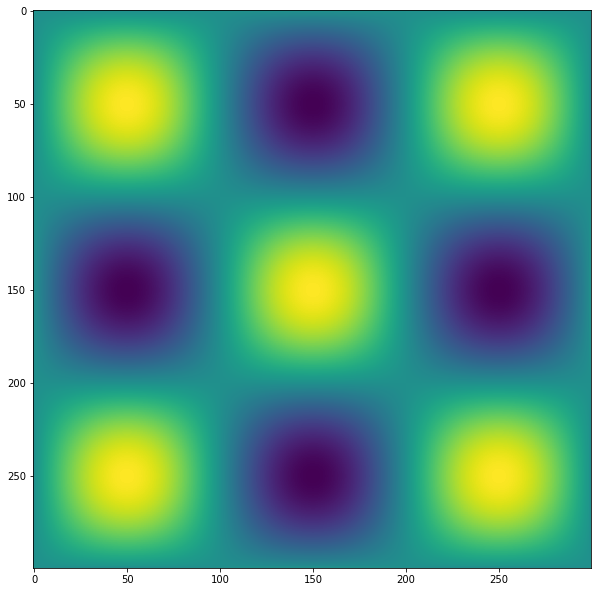

In [11]:
fig = plt.figure(figsize=(10, 20))
plt.imshow(psi_r)

In [12]:
psi_i[50][50]

-3.5090297391821013e-06